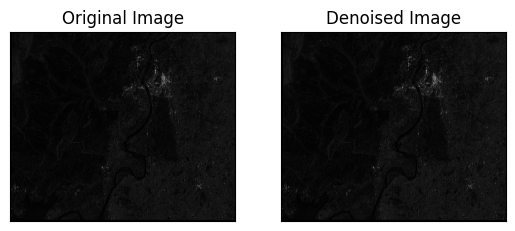

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread(r"C:\(Kotri)ALPSRP256830490-H2.2_UA\HH-ALPSRP256830490-H2.2_UA.tif", 0)  # Load the TIFF image in grayscale
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [2]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

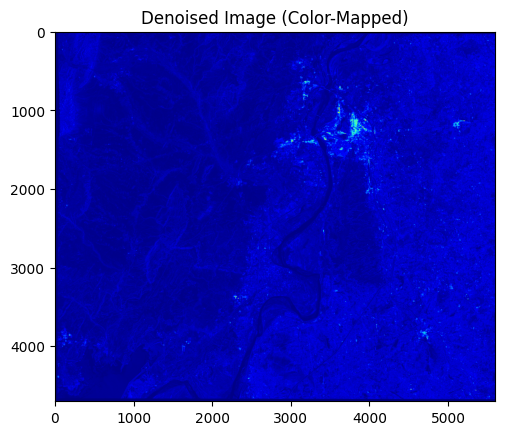

In [1]:
#color Mapping
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread(r"C:\(Kotri)ALPSRP256830490-H2.2_UA\HH-ALPSRP256830490-H2.2_UA.tif", 0)

# Apply noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply a colormap for visualization
colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

In [4]:
#Mean Squared Error
import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread(r"C:\(Kotri)ALPSRP256830490-H2.2_UA\HH-ALPSRP256830490-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 5.741386512158055


In [5]:
#Structural Similarity Index (SSIM)
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread(r"C:\(Kotri)ALPSRP256830490-H2.2_UA\HH-ALPSRP256830490-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9407924162488325


In [7]:
#Reading specific pixel values
import cv2
import numpy as np

# # Load the original image
original_image = cv2.imread(r"C:\(Kotri)ALPSRP256830490-H2.2_UA\HH-ALPSRP256830490-H2.2_UA.tif", 0)  # Load in grayscale

# # Load the denoised image
denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

# Convert the images to NumPy arrays
original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

# Now you can access the pixel values as NumPy arrays
# For example, to access the pixel value at row 1, column 1:
row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 10
Denoised pixel value at (150, 150): 13


Original Image Amplitude (Magnitude):
[[1206.         4191.70938249 5302.61627054 ... 1866.99678375
  5302.61627054 4191.70938249]
 [3809.43760857 2687.75270082 1871.94622385 ... 3080.24453858
  4042.96411029 4556.53826011]
 [4770.93151588 2880.74487108 3847.54036032 ... 5095.20383008
  1020.96620865 1720.72687218]
 ...
 [1649.42781582 1157.17492682 5317.24170292 ...  782.958854
  1529.41507554 1705.95478642]
 [4770.93151588 1720.72687218 1020.96620865 ... 5188.82166603
  3847.54036032 2880.74487108]
 [3809.43760857 4556.53826011 4042.96411029 ... 1267.15364046
  1871.94622385 2687.75270082]]
Denoised Image Amplitude (Magnitude):
[[ 239.         1446.52989214 1867.53725645 ...  679.93092946
  1867.53725645 1446.52989214]
 [1150.15483999  734.77802764 2382.64294362 ... 1034.9565629
   858.93917005  251.66340835]
 [ 519.69283607 2680.27371984 1924.20536065 ... 1458.34141902
   916.35987265 1047.79702344]
 ...
 [ 911.19385044  355.49227072  693.94711006 ... 1650.09564118
  1142.57919286 2

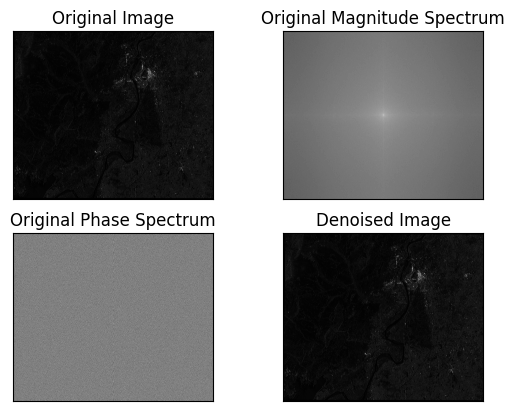

In [9]:
#Fourier Transform
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
original_image = cv2.imread(r"C:\(Kotri)ALPSRP256830490-H2.2_UA\HH-ALPSRP256830490-H2.2_UA.tif", 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)

# Ensure the images are not None
if original_image is not None and denoised_image is not None:
    # Compute the Fourier transform of the original image
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    # Compute the Fourier transform of the denoised image
    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)
    
     # Print amplitude (magnitude) values for both images
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    # Print phase values for both images
    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    # Display the original image and its Fourier transform
    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    # Display the denoised image and its Fourier transform
    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")
